|| Predicting Income Levels Using Demographic Information: A Classification Analysis of the Adult Dataset || 
By: Alind Singh (R00224088)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the Adult dataset
adult_data = pd.read_csv("adult.csv", na_values='?')

#Data Inspection
print(adult_data.head(),'\n')      #Display the first 5 rows
print(adult_data.shape, '\n')      #Check the dimensions of the dataset


   age workclass  fnlwgt     education  education.num marital.status  \
0   90       NaN   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66       NaN  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                NaN  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                NaN      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

                age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  
<=50K    24720
>50K      7841
Name: income, dtype: int64


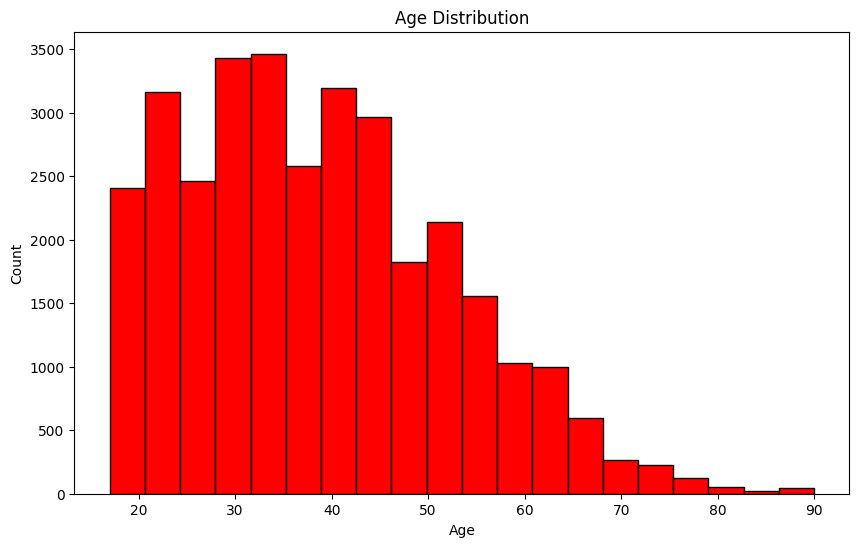

In [3]:
#Summary Statistics
print(adult_data.describe())   #Compute summary statistics for numerical features
print(adult_data['income'].value_counts())    #Frequency counts for the target variable

#Data Visualisation
#Histogram for Age distribution
plt.figure(figsize=(10, 6))
plt.hist(adult_data['age'], edgecolor='black', color='red', bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

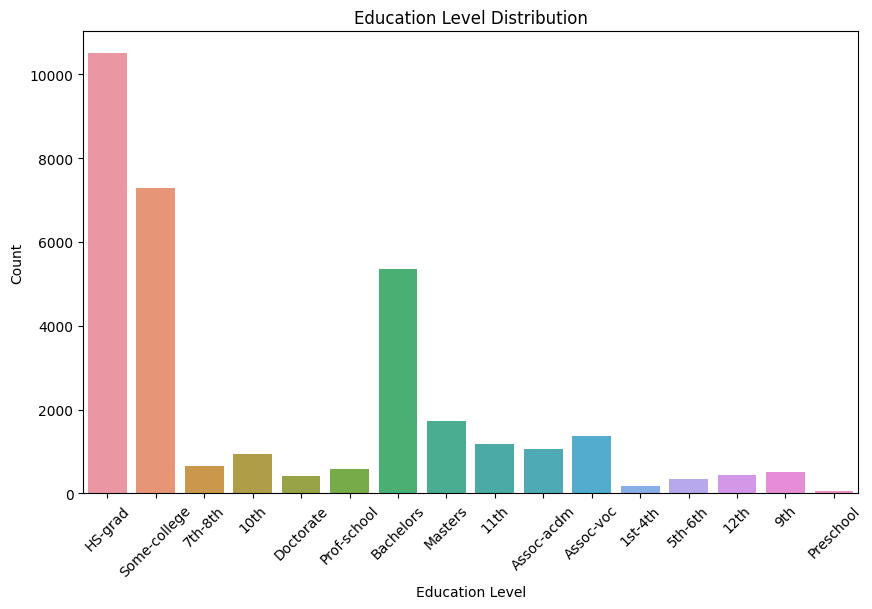

In [4]:
#Bar chart for education level
plt.figure(figsize=(10, 6))
sns.countplot(data=adult_data, x='education')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level Distribution')
plt.xticks(rotation=45)
plt.show()

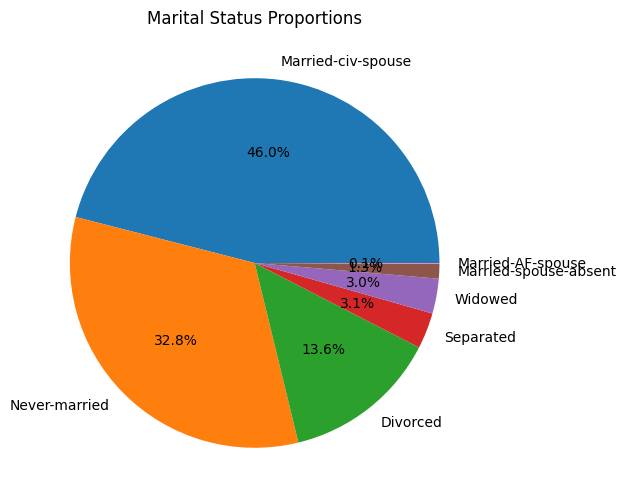

In [5]:
#Pie Chart for Marital Status Distribution
marital_status_count = adult_data['marital.status'].value_counts()

plt.figure(figsize=(10,6))
plt.pie(marital_status_count.values, labels=marital_status_count.index, autopct='%1.1f%%')
plt.title('Marital Status Proportions')
plt.show()

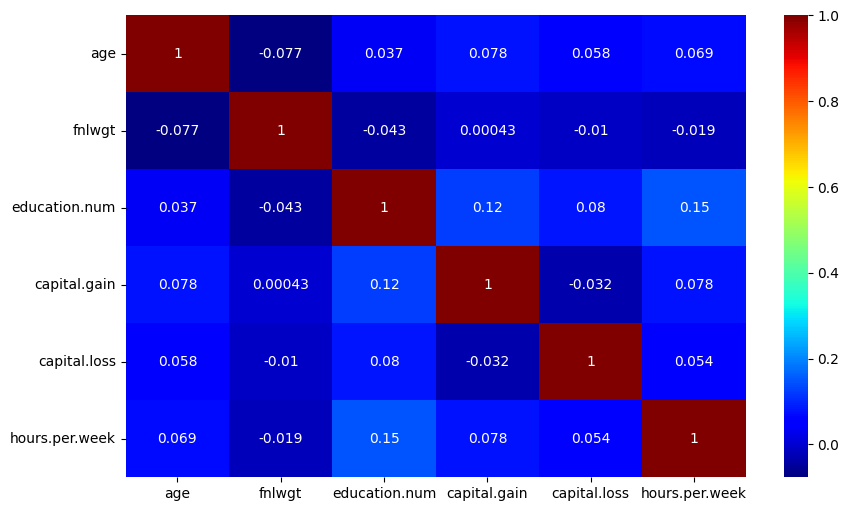

In [6]:
#Heatmap for correlation matrix of the numerical variables
cor_matrix = adult_data.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(cor_matrix,cmap='jet',annot=True)
plt.show()

In [7]:
from scipy.stats import chi2_contingency
import numpy as np

#Create a contingency table
cont_table = pd.crosstab(adult_data['marital.status'],adult_data['income'])

#Compute the chi-squared statistic, p-value, and degrees of freedom
chi2, p, dof, expected = chi2_contingency(cont_table)

#Compute Cramer's V statistic
n = cont_table.sum().sum()
V = np.sqrt(chi2/(n * (min(cont_table.shape) - 1)))

#Print the resulting value
print("Cramer's V statistic: ", V)

Cramer's V statistic:  0.4474038365741476


In [8]:
#Data Preprocessing
print('Missing Values:\n',adult_data.isna().sum()) #Check for missing values

Missing Values:
 age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


In [9]:
#Calculate the mode of the columns with missing values
workclass_mode = adult_data['workclass'].mode()[0]
occupation_mode = adult_data['occupation'].mode()[0]
native_country_mode = adult_data['native.country'].mode()[0]

#Replace missing values with the calculated mode
adult_data['workclass'] = adult_data['workclass'].fillna(workclass_mode)
adult_data['occupation'] = adult_data['occupation'].fillna(occupation_mode)
adult_data['native.country'] = adult_data['native.country'].fillna(native_country_mode)

In [10]:
print('Missing Values:\n',adult_data.isna().sum()) #Check for missing values again

Missing Values:
 age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [11]:
from sklearn.preprocessing import LabelEncoder

#Initialise LabelEncoder
lab_encoder = LabelEncoder()

#Encode all the categorical variables
adult_data['workclass'] = lab_encoder.fit_transform(adult_data['workclass'])
adult_data['education'] = lab_encoder.fit_transform(adult_data['education'])
adult_data['marital.status'] = lab_encoder.fit_transform(adult_data['marital.status'])
adult_data['occupation'] = lab_encoder.fit_transform(adult_data['occupation'])
adult_data['relationship'] = lab_encoder.fit_transform(adult_data['relationship'])
adult_data['race'] = lab_encoder.fit_transform(adult_data['race'])
adult_data['sex'] = lab_encoder.fit_transform(adult_data['sex'])
adult_data['native.country'] = lab_encoder.fit_transform(adult_data['native.country'])
adult_data['income'] = lab_encoder.fit_transform(adult_data['income'])

In [12]:
from sklearn.preprocessing import StandardScaler

#Initialize the scaler
scaler = StandardScaler()

#Select the numerical features to be scaled
num_features = ['fnlwgt','capital.loss','hours.per.week']

#Perform feature scaling
adult_data[num_features] = scaler.fit_transform(adult_data[num_features])

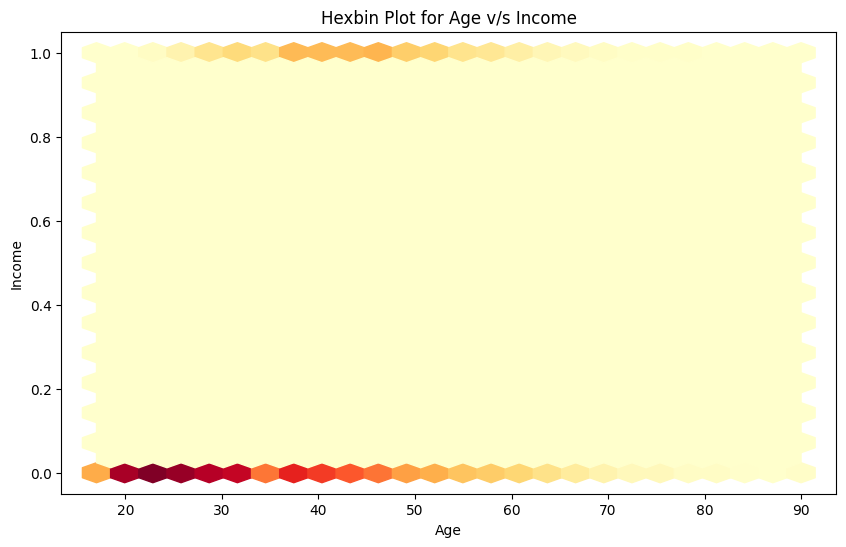

In [13]:
#Create a Density plot for Age v/s Income
plt.figure(figsize=(10,6))
plt.hexbin(adult_data['age'],adult_data['income'],gridsize=25,cmap='YlOrRd')
#plt.scatter(x=adult_data['age'], y=adult_data['income'],color='green',s=5,alpha=0.01)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Hexbin Plot for Age v/s Income')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

#Split the adult dataset into training and test datasets in 70:30 ratio
train, test = train_test_split(adult_data,train_size=0.7)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import itertools as itr

#Select the features and target variable
features = ['age','workclass','fnlwgt','education','education.num','marital.status',
            'occupation','relationship','race','sex','capital.gain','capital.loss',
            'hours.per.week','native.country']
print("Decision Tree's Evaluation:")
max_acc = 0
max_feat = None
for i in range(1,len(features)+1):
    combo = itr.combinations(features,i)
    target = 'income'
    clf = DecisionTreeClassifier()
    temp_acc = 0
    temp_feat = None

    for c in list(combo):    
        #Train the model on the decision tree classifier
        clf.fit(train[list(c)], train[target])

        #Predict the income on the testing data
        predictions = clf.predict(test[list(c)])

        #Calculate the accuracy of our decision tree model
        accuracy = accuracy_score(test[target], predictions)

        if accuracy > temp_acc:
            temp_acc = accuracy
            temp_feat = c

    print("\nMaximum accuracy for combination of",i,"feature(s):")
    print("Model's Features: ",temp_feat)
    print("Model's Accuracy: ",temp_acc)
    if temp_acc > max_acc:
        max_acc = temp_acc
        max_feat = temp_feat         

print('\nCombination of features with maximum accuracy amongst all models:\n',max_feat,' | ',max_acc)            

Decision Tree's Evaluation:

Maximum accuracy for combination of 1 feature(s):
Model's Features:  ('capital.gain',)
Model's Accuracy:  0.8150271266250384

Maximum accuracy for combination of 2 feature(s):
Model's Features:  ('capital.gain', 'capital.loss')
Model's Accuracy:  0.8379568021291841

Maximum accuracy for combination of 3 feature(s):
Model's Features:  ('education.num', 'relationship', 'capital.gain')
Model's Accuracy:  0.8533114955471389

Maximum accuracy for combination of 4 feature(s):
Model's Features:  ('education', 'marital.status', 'capital.gain', 'capital.loss')
Model's Accuracy:  0.8646739686764254

Maximum accuracy for combination of 5 feature(s):
Model's Features:  ('workclass', 'education', 'marital.status', 'capital.gain', 'capital.loss')
Model's Accuracy:  0.8662094380182209

Maximum accuracy for combination of 6 feature(s):
Model's Features:  ('workclass', 'education', 'marital.status', 'occupation', 'capital.gain', 'capital.loss')
Model's Accuracy:  0.86743781

In [17]:
from sklearn.linear_model import LogisticRegression

print("Logistic Regression's Evaluation:")
max_acc = 0
max_feat = None
for i in range(1,len(features)-3):
    combo = itr.combinations(features,i)
    model = LogisticRegression(max_iter=2000)
    temp_acc = 0
    temp_feat = None

    for c in list(combo):    
        #Train the Logistic Regression model using the training set
        model.fit(train[list(c)], train[target])

        #Predict the income on the testing data
        predictions = model.predict(test[list(c)])

        #Calculate the accuracy of our logistic regression model
        accuracy = accuracy_score(test[target], predictions)

        if accuracy > temp_acc:
            temp_acc = accuracy
            temp_feat = c

    print("\nMaximum accuracy for combination of",i,"feature(s):")
    print("Model's Features: ",temp_feat)
    print("Model's Accuracy: ",temp_acc)
    if temp_acc > max_acc:
        max_acc = temp_acc
        max_feat = temp_feat         

print('\nCombination of features with maximum accuracy amongst all models:\n',max_feat,' | ',max_acc)

Logistic Regression's Evaluation:

Maximum accuracy for combination of 1 feature(s):
Model's Features:  ('capital.gain',)
Model's Accuracy:  0.8002866209438019

Maximum accuracy for combination of 2 feature(s):
Model's Features:  ('capital.gain', 'capital.loss')
Model's Accuracy:  0.8142082096427474

Maximum accuracy for combination of 3 feature(s):
Model's Features:  ('fnlwgt', 'capital.gain', 'capital.loss')
Model's Accuracy:  0.8141058450199611

Maximum accuracy for combination of 4 feature(s):
Model's Features:  ('education.num', 'relationship', 'sex', 'capital.gain')
Model's Accuracy:  0.8290510799467704

Maximum accuracy for combination of 5 feature(s):
Model's Features:  ('education.num', 'relationship', 'sex', 'capital.gain', 'native.country')
Model's Accuracy:  0.8296652676834886

Maximum accuracy for combination of 6 feature(s):
Model's Features:  ('education.num', 'relationship', 'race', 'sex', 'capital.gain', 'native.country')
Model's Accuracy:  0.8304841846657796

Maximum 

In [17]:
from sklearn.ensemble import RandomForestClassifier

print("Random Forest's Evaluation:")
max_acc = 0
max_feat = None
for i in range(1,len(features)+1):
    combo = itr.combinations(features,i)
    rf_clf = RandomForestClassifier()
    temp_acc = 0
    temp_feat = None

    for c in list(combo):    
        #Train the Random Forest model using the training set
        rf_clf.fit(train[list(c)], train[target])

        #Predict the income on the testing data
        predictions = rf_clf.predict(test[list(c)])

        #Calculate the accuracy of our random forest model
        accuracy = accuracy_score(test[target], predictions)

        if accuracy > temp_acc:
            temp_acc = accuracy
            temp_feat = c

    print("\nMaximum accuracy for combination of",i,"feature(s):")
    print("Model's Features: ",temp_feat)
    print("Model's Accuracy: ",temp_acc)
    if temp_acc > max_acc:
        max_acc = temp_acc
        max_feat = temp_feat

    if max_acc - temp_acc >= 0.002:
        break         

print('\nCombination of features with maximum accuracy amongst all models:\n',max_feat,' | ',max_acc)

Random Forest's Evaluation:

Maximum accuracy for combination of 1 feature(s):
Model's Features:  ('capital.gain',)
Model's Accuracy:  0.8150271266250384

Maximum accuracy for combination of 2 feature(s):
Model's Features:  ('capital.gain', 'capital.loss')
Model's Accuracy:  0.8380591667519706

Maximum accuracy for combination of 3 feature(s):
Model's Features:  ('education.num', 'relationship', 'capital.gain')
Model's Accuracy:  0.8530044016787798

Maximum accuracy for combination of 4 feature(s):
Model's Features:  ('education.num', 'relationship', 'capital.gain', 'capital.loss')
Model's Accuracy:  0.8645716040536391

Maximum accuracy for combination of 5 feature(s):
Model's Features:  ('education', 'occupation', 'relationship', 'capital.gain', 'capital.loss')
Model's Accuracy:  0.8667212611321528

Maximum accuracy for combination of 6 feature(s):
Model's Features:  ('workclass', 'education.num', 'occupation', 'relationship', 'capital.gain', 'capital.loss')
Model's Accuracy:  0.86815

In [18]:
from sklearn.svm import SVC

print("Support Vector Machine's Evaluation:")
max_acc = 0
max_feat = None
for i in range(1,len(features)+1):
    combo = itr.combinations(features,i)
    svm_model = SVC()
    temp_acc = 0
    temp_feat = None

    for c in list(combo):    
        #Train the Support Vector Machine model using the training set
        svm_model.fit(train[list(c)], train[target])

        #Predict the income on the testing data
        predictions = svm_model.predict(test[list(c)])

        #Calculate the accuracy of our Support Vector Machine model
        accuracy = accuracy_score(test[target], predictions)

        if accuracy > temp_acc:
            temp_acc = accuracy
            temp_feat = c

    print("\nMaximum accuracy for combination of",i,"feature(s):")
    print("Model's Features: ",temp_feat)
    print("Model's Accuracy: ",temp_acc)
    if temp_acc > max_acc:
        max_acc = temp_acc
        max_feat = temp_feat

    if max_acc - temp_acc >= 0.002:
        break         

print('\nCombination of features with maximum accuracy amongst all models:\n',max_feat,' | ',max_acc)

Support Vector Machine's Evaluation:

Maximum accuracy for combination of 1 feature(s):
Model's Features:  ('capital.gain',)
Model's Accuracy:  0.8042788412324701

Maximum accuracy for combination of 2 feature(s):
Model's Features:  ('education.num', 'relationship')
Model's Accuracy:  0.8259801412631794

Maximum accuracy for combination of 3 feature(s):
Model's Features:  ('education.num', 'relationship', 'capital.loss')
Model's Accuracy:  0.8278227044733341

Maximum accuracy for combination of 4 feature(s):
Model's Features:  ('education.num', 'relationship', 'capital.loss', 'hours.per.week')
Model's Accuracy:  0.8310983724024977


In [20]:
from sklearn.ensemble import GradientBoostingClassifier

print("Gradient Boosting's Evaluation:")
max_acc = 0
max_feat = None
for i in range(1,len(features)+1):
    combo = itr.combinations(features,i)
    gb_clf = GradientBoostingClassifier()
    temp_acc = 0
    temp_feat = None

    for c in list(combo):    
        #Train the Gradient Boosting model using the training set
        gb_clf.fit(train[list(c)], train[target])

        #Predict the income on the testing data
        predictions = gb_clf.predict(test[list(c)])

        #Calculate the accuracy of our Gradient Boosting model
        accuracy = accuracy_score(test[target], predictions)

        if accuracy > temp_acc:
            temp_acc = accuracy
            temp_feat = c

    print("\nMaximum accuracy for combination of",i,"feature(s):")
    print("Model's Features: ",temp_feat)
    print("Model's Accuracy: ",temp_acc)
    if temp_acc > max_acc:
        max_acc = temp_acc
        max_feat = temp_feat

    if max_acc - temp_acc >= 0.002:
        break         

print('\nCombination of features with maximum accuracy amongst all models:\n',max_feat,' | ',max_acc)

Gradient Boosting's Evaluation:

Maximum accuracy for combination of 1 feature(s):
Model's Features:  ('capital.gain',)
Model's Accuracy:  0.8066332275565564

Maximum accuracy for combination of 2 feature(s):
Model's Features:  ('capital.gain', 'capital.loss')
Model's Accuracy:  0.8240352134302386

Maximum accuracy for combination of 3 feature(s):
Model's Features:  ('education.num', 'relationship', 'capital.gain')
Model's Accuracy:  0.8472719828027434

Maximum accuracy for combination of 4 feature(s):
Model's Features:  ('education.num', 'relationship', 'capital.gain', 'capital.loss')
Model's Accuracy:  0.8550516941345071

Maximum accuracy for combination of 5 feature(s):
Model's Features:  ('education.num', 'occupation', 'relationship', 'capital.gain', 'capital.loss')
Model's Accuracy:  0.8570989865902344

Maximum accuracy for combination of 6 feature(s):
Model's Features:  ('age', 'education.num', 'marital.status', 'occupation', 'capital.gain', 'capital.loss')
Model's Accuracy:  0.8